<a href="https://colab.research.google.com/github/NurJim/Machine-Learning/blob/main/Code_inmobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SET:  Inmobiliaria**


## **Objetivo**

El objetivo de este proyecto es crear un modelo de predicción sobre el precio de las casas del condado de King, Washington, EE. UU. 

## **Datos**

Los datos que aquí se van a tratar pueden encontrarse en:
https://www.kaggle.com/datasets/shivachandel/kc-house-data/code

La interpretación de las varibales puede ser encontrada en:
https://keepcoding.io/blog/metodos-de-filtrado-en-machine-learning/


## **Librerías**

Para llevar a cabo el análisis de los datos, necesitaremos las siguientes librerías:


In [1]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as iter
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from scipy.stats import mstats, multivariate_normal, norm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, precision_score, mean_squared_error, mean_absolute_error, r2_score

## **Exploración de datos**

Comenzamos importando los datos en forma de DataFrame.

In [2]:
data = pd.read_csv("Data_inmobiliaria.csv")

Y vemos la dimensión que tienen.


In [3]:
data.shape

(21613, 21)

En este caso, tenemos un total de 21613 observaciones evaluadas en 21 variables.

Para hacernos una idea de los datos, vemos la cabecera de los mismos.

In [4]:
data.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

Observamos:


*   La variable ***id*** representa un código de identificación de las observaciones, por lo que podría ser transformado a un índice. 
* La variable ***zipcode*** representa un código de localización, al igual que la combinación de ***lat*** y ***long*** . Debido a que las segundas son más precisas, eliminaremos la variable ***zipcode*** más adelante.
*   La variable ***date*** tiene formato de fecha.
*   Es bastante probable que existan variables que estén contenidas unas en otras. Por ejemplo, ***sqft_living*** podría estar contenida en ***sqft_lot***. Debido a esto, haremos un análisis de correlaciones más adelante.
*   Las variables parecen ser numéricas continuas y numéricas discretas.





## **Análisis de observaciones**


Antes de comenzar con el análisis de variables en sí, debemos hacer unas comprobaciones previas sobre las observaciones.

**Datos faltantes**

Comenzamos viendo si existen valores nulos, pues en caso de haberlos deberíamos plantearnos su  imputación. Esta comprobación se hará de una forma general, a través de `.info()`, y de una forma especifíca, a través de `.isnull().sum.`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

En principio, parece que no hay datos missing. Además, observamos que todas las variables son de tipo numérico, a excepción de ***date***.


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Efectivamente, no existen valores nulos en la base de datos.

**Duplicados**

Comprobamos si existen observaciones duplicadas.




In [7]:
data[data.duplicated()].sum()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

## **Análisis de variables**

**Limipeza del data set**

Una vez hechas las comprobaciones sobre las observaciones de la base de datos, comenzamos con el análisis de las variable.

Tal y como se ha mencionado con anterioridad, transformamos la variable ***id*** en un índice y eliminamos la variable ***zipcode*** . Además, eliminamos la vaiable ***date***, ya que no nos aporta nada al análisis.

In [8]:
# Eliminacion de variables
dat = data.drop(['zipcode','date'],axis=1)

# Cambio de indice
dat.set_index(keys='id',inplace=True)

Comprobamos que los cambios se han realizado de forma satisfactoria mostrando la cabecera del DataFrame.


In [9]:
dat.head(3)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   

            yr_built  yr_renovated      lat     long  sqft_living15  \
id                                                                    
7129300520      1955             0  47.5112 -122.257           1340   
6414100192      1951          1991  47.7210 -122.319           1690   
5631500400      1933             0  47.7379 -122.233           2720   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062

**Estadísticos relevantes**

Comenzamos el análisis con un computo general de los estadísticos más destacados.

In [10]:
dat.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258     47.560053   
std      828.090978     442.575043     29.373411    401.679240      0.138564   
min      290.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1190.000000       0.000000   1951.000000      0.000000     47.471000   
50%     1560.000000       0.000000   1975.000000      0.000000     47.571800   
75%     2210.000000     560.000000   1997.000000      0.000000     47.678000   
max     9410.000000    4820.000000   2015.000000   2015.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21613.000000   21613.000000   21613.000000  
mean    -122.213896    1986.552492   12768.455652  
std        0.140828     685.391304   27304.179631  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

A la vista de la tabla, destaca:
*  Existen casas sin habitaciones y/o sin baños, ya que las variables ***bedrooms*** y ***bathrooms*** alcanzan su mínimo en cero.
* Más del 75% de las casas no tienen acceso directo a un lago.
* Más del 75% de las casas tienen unas vistas puntuadas a cero. 
* La mayoría de las casas tienen tanto una condición como una puntuación media-alta.
* Más de la mitad de las casas no tienen sótano.
* Más del 75% de las casas son anteriores al año 2000 y no han sido renovadas recientemente.


**Detección de outliers**

Antes de seguir trabajando con las variables de interés, vamos a analizar si existen outliers, es decir, si existen observaciones que destaquen de las demás. Para ello, emplearemos el método de Tuckey, donde cualquier valor que esté a más de 3 veces la desviación estándar de la media se considera un valor atípico:

In [11]:
# Metodo de Tuckey
def out_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

# Analisis de la base de datos
for k in dat.columns.values:
  out_ind, out_val = out_tukey(dat[k])
  #print('variable:', k)
  #print('indice:', out_ind)
  #print('valores:', out_val)


**NOTA:** En este caso se obtienen muchos outliers por lo que se deja comentada la parte del código que los muestra por pantalla. 

Realizamos unos gráficos de cajas para ver con más claridad lo obtenido anteriormente. 

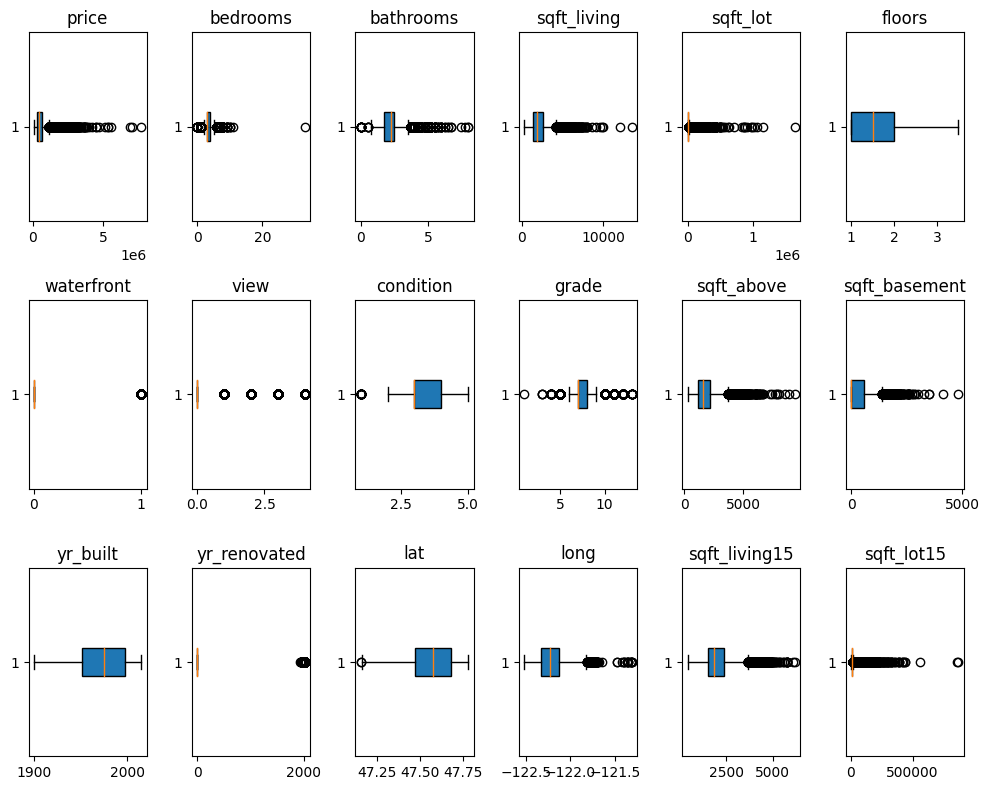

In [12]:
# Numero de filas y columnas necesarios para dibujar todos los boxplots
n_rows = 3
n_cols = 6

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# Boxplot de cada variable
for i, columna in enumerate(dat.columns.values):
    ax = axs[i // n_cols][i % n_cols]
    ax.boxplot(dat[columna],vert=False,patch_artist=True) # boxplot de la variable
    ax.set_title(columna)

# Ajuste de espacios entre subgraficos
fig.tight_layout()

# Mostrar la figura
plt.show()

Tanto de forma analítica como de forma gráfica se detectan muchos posibles outlier. Sin embargo, estos solo relfejan las desigualdades que existen entre las casas evaluadas. Tal y como se ha mencionado en el apartado de **Estadísticos relevantes** existen pocas casas con vistas a un lago, por lo que cumplir esta condición podría ser representado como un outlier. Esto mismo ocurre con muchas variables que reprentan cuestiones que pocas casas suelen cumplir.

Vamos a intentar refinar la búsqueda de observaciones outliers. Para ello, vamos a definir una observación **outlier global** como  aquella que se considera anómala en más de la mitad de las variables evaluadas. 

In [13]:
# Almacenamiento de outliers
ind_total = []
val_total = []
for k in range(dat.shape[1]):
  ind, val = out_tukey(dat.iloc[:, k])
  ind_total.append(ind) 
  val_total.append(val) 

# Unificacion en una sola lista
ind_total = list(iter.chain(*ind_total))
val_total = list(iter.chain(*val_total))

# Comprobacion de repeticion
lim = dat.shape[1]/2
k = 0
out_gen = []
for i in data.id:
  count = ind_total.count(i)
  if count > lim:
    out_gen.append(i)

# Outliers globales
print('id de los outliers globales:',np.unique(out_gen))

id de los outliers globales: [ 853200010 1225069038 1247600105 2303900035 2424049029 2524049166
 3225079035 3528000040 4139420590 4139480200 4217402115 6762700020
 7558700030 7852011070 8106100085 8106100105 8835770170 9208900037
 9808700762]


Eliminamos las observaciones consideradas como outliers globales.

In [14]:
dat.drop(out_gen, axis=0, inplace=True)

**Estandarización de variables**

Para evitar que las dimensiones de las diferentes magnitudes en las que se mide cada variable sesgue el modelo de predicción, estadarizamos cada una de ellas.

In [15]:
# Estandarizacion
dt = pd.DataFrame()
for columna in dat.columns.values:
    x = (dat[columna] - dat[columna].mean()) / dat[columna].std()
    dt[columna] = x

# Cabecera de las variables estandarizadas
dt.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
id                                                                           
7129300520 -0.896582 -0.397619  -1.455752    -0.992002 -0.227531 -0.915061   
6414100192  0.001609 -0.397619   0.180826     0.548803 -0.188961  0.937368   
5631500400 -1.015640 -1.474646  -1.455752    -1.446484 -0.122142 -0.915061   
2487200875  0.189147  0.679409   1.162774    -0.127378 -0.243279 -0.915061   
1954400510 -0.077952 -0.397619  -0.146489    -0.437756 -0.168658 -0.915061   

            waterfront     view  condition     grade  sqft_above  \
id                                                                 
7129300520   -0.085857 -0.30431  -0.629104 -0.558503   -0.738544   
6414100192   -0.085857 -0.30431  -0.629104 -0.558503    0.469922   
5631500400   -0.085857 -0.30431  -0.629104 -1.414030   -1.239020   
2487200875   -0.085857 -0.30431   2.443970 -0.558503   -0.897232   
1954400510   -0.085857 -0.30431  -0.629104  0.297023   -0.128208   

            sqft_basement  yr_built  yr_renovated       lat      long  \
id                                                                      
7129300520      -0.660734 -0.544391     -0.209754 -0.352134 -0.305589   
6414100192       0.250998 -0.680563      4.754942  1.161421 -0.745912   
5631500400      -0.660734 -1.293337     -0.209754  1.283342 -0.135142   
2487200875       1.413457 -0.203961     -0.209754 -0.282877 -1.271459   
1954400510      -0.660734  0.544984     -0.209754  0.409693  1.200031   

            sqft_living15  sqft_lot15  
id                                     
7129300520      -0.944584   -0.260253  
6414100192      -0.431511   -0.187063  
5631500400       1.078389   -0.171497  
2487200875      -0.915265   -0.284171  
1954400510      -0.270260   -0.192067

**Normalidad**

Algunos modelos se basan en una hipótesis de normalidad, por lo que comprobamos si se da el caso. 

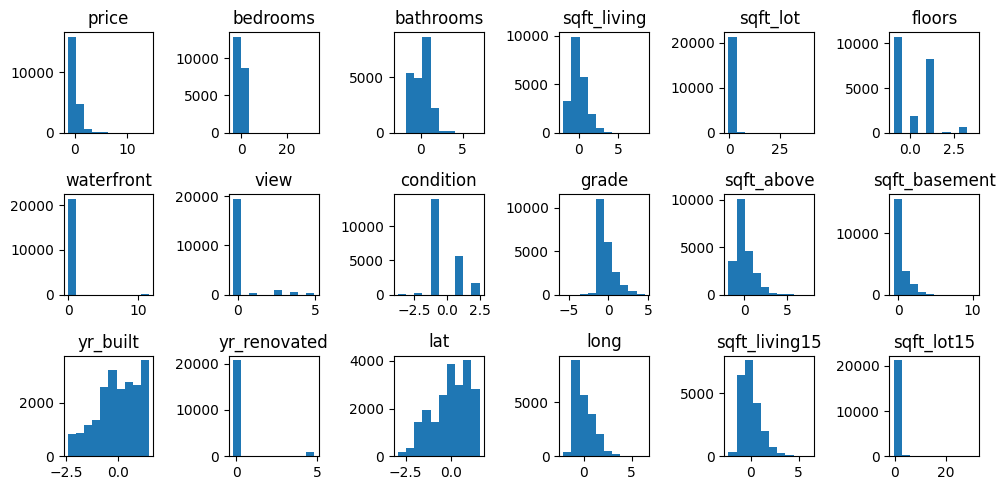

In [16]:
# Numero de filas y columnas necesarios para dibujar todos los subgraficos
n_rows = 3
n_cols = 6

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))

# Histograma de cada variable
for i, columna in enumerate(dt.columns.values):
    ax = axs[i // n_cols][i % n_cols]
    ax.hist(dt[columna]) # histograma de la variable
    ax.set_title(columna)

# Ajuste de espacios entre subgraficos
fig.tight_layout()

# Mostrar la figura
plt.show()

A pesar de que ninguna variable parece normal, realizamos un test de normalidad variable a variable. Para ello emplearemos la prueba de normalidad de Mardia que comprueba la normalidad de cada una de las variables de un DataFrame. Esta prueba utiliza una medida de asimetría y una medida de curtosis para calcular una estadística de prueba. Si la estadística de prueba es significativa, entonces hay evidencia de que los datos no siguen una distribución normal.



In [17]:
stat, pvalue = mstats.normaltest(dt)
print("p-valores:", pvalue)

p-valores: [0.00000000e+000 0.00000000e+000 1.80126437e-202 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


Como todos los p-valores son menores que 0.05 (significaión por defecto) se rechaza la hipótesis de que las variables son normales una a una.

**Correlaciones**

Hacemos una análisis de correlaciones para comprobar si existe alguna variable 
redundante en nuestro data set.

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.306754   0.518227     0.695002  0.086469  0.261745   
bedrooms       0.306754  1.000000   0.513388     0.576980  0.029104  0.174237   
bathrooms      0.518227  0.513388   1.000000     0.750372  0.082059  0.502129   
sqft_living    0.695002  0.576980   0.750372     1.000000  0.166588  0.355531   
sqft_lot       0.086469  0.029104   0.082059     0.166588  1.000000 -0.007212   
floors         0.261745  0.174237   0.502129     0.355531 -0.007212  1.000000   
waterfront     0.248602 -0.011899   0.055547     0.092035  0.021206  0.022097   
view           0.388558  0.072651   0.175925     0.270880  0.071159  0.027194   
condition      0.036710  0.028547  -0.126102    -0.059709 -0.008834 -0.264234   
grade          0.673267  0.353649   0.661220     0.761786  0.109462  0.459172   
sqft_above     0.598656  0.475257   0.680155     0.874427  0.178355  0.525835   
sqft_basement  0.311240  0.298977   0.272911     0.423449  0.009508 -0.250820   
yr_built       0.055842  0.153891   0.509459     0.322422  0.052077  0.489779   
yr_renovated   0.122565  0.017431   0.047622     0.050611  0.007507  0.005408   
lat            0.317281 -0.009499   0.023426     0.051329 -0.086665  0.049321   
long           0.022221  0.128985   0.223641     0.242527  0.228212  0.125232   
sqft_living15  0.590326  0.388733   0.564245     0.756576  0.140585  0.279591   
sqft_lot15     0.078606  0.025804   0.080341     0.176471  0.716644 -0.013528   

               waterfront      view  condition     grade  sqft_above  \
price            0.248602  0.388558   0.036710  0.673267    0.598656   
bedrooms        -0.011899  0.072651   0.028547  0.353649    0.475257   
bathrooms        0.055547  0.175925  -0.126102  0.661220    0.680155   
sqft_living      0.092035  0.270880  -0.059709  0.761786    0.874427   
sqft_lot         0.021206  0.071159  -0.008834  0.109462    0.178355   
floors           0.022097  0.027194  -0.264234  0.459172    0.525835   
waterfront       1.000000  0.399645   0.015289  0.076179    0.061506   
view             0.399645  1.000000   0.046561  0.241980    0.155096   
condition        0.015289  0.046561   1.000000 -0.145636   -0.160080   
grade            0.076179  0.241980  -0.145636  1.000000    0.754498   
sqft_above       0.061506  0.155096  -0.160080  0.754498    1.000000   
sqft_basement    0.074398  0.267388   0.176138  0.157564   -0.069238   
yr_built        -0.026374 -0.055690  -0.361354  0.448446    0.427707   
yr_renovated     0.092454  0.102687  -0.060543  0.011833    0.019223   
lat             -0.015751  0.005225  -0.015043  0.113690   -0.002635   
long            -0.042297 -0.080725  -0.106312  0.198229    0.346367   
sqft_living15    0.080678  0.272339  -0.093260  0.710231    0.730736   
sqft_lot15       0.030459  0.067647  -0.002838  0.114770    0.188478   

               sqft_basement  yr_built  yr_renovated       lat      long  \
price               0.311240  0.055842      0.122565  0.317281  0.022221   
bedrooms            0.298977  0.153891      0.017431 -0.009499  0.128985   
bathrooms           0.272911  0.509459      0.047622  0.023426  0.223641   
sqft_living         0.423449  0.322422      0.050611  0.051329  0.242527   
sqft_lot            0.009508  0.052077      0.007507 -0.086665  0.228212   
floors             -0.250820  0.489779      0.005408  0.049321  0.125232   
waterfront          0.074398 -0.026374      0.092454 -0.015751 -0.042297   
view                0.267388 -0.055690      0.102687  0.005225 -0.080725   
condition           0.176138 -0.361354     -0.060543 -0.015043 -0.106312   
grade               0.157564  0.448446      0.011833  0.113690  0.198229   
sqft_above         -0.069238  0.427707      0.019223 -0.002635  0.346367   
sqft_basement       1.000000 -0.135668      0.068174  0.110464 -0.148068   
yr_built           -0.135668  1.000000     -0.224716 -0.148180  0.409085   
yr_renovated        0.068174 -0.224716      1

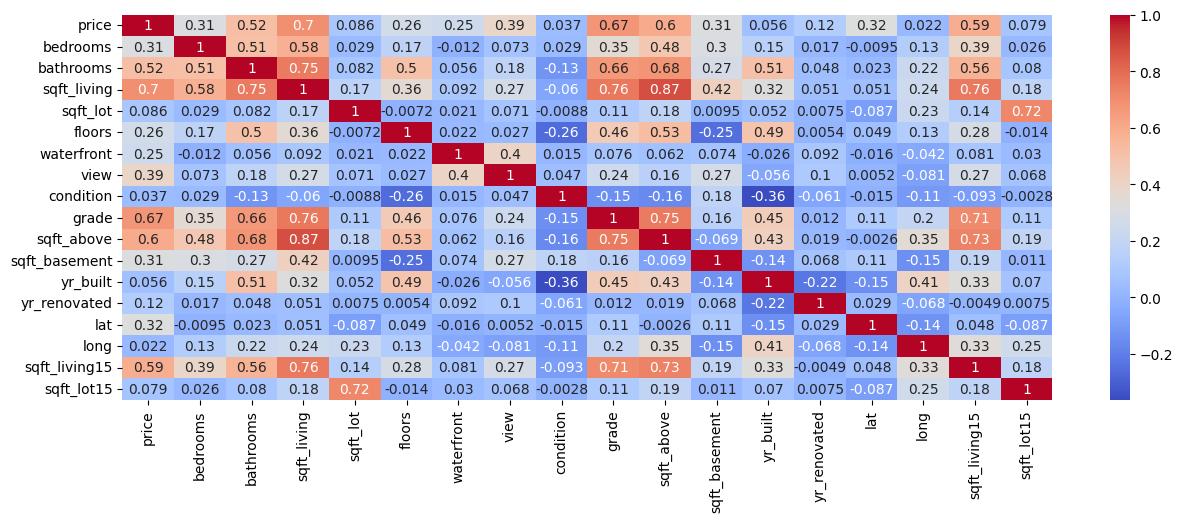

In [18]:
# Matriz de correlaciones
correlaciones = dt.corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(15,5))
sns.heatmap(correlaciones,cmap="coolwarm",annot=True) 

# Visualizacion
correlaciones

Para una mejor interpretación de los datos creamos una función que extraiga los pares de variables que correlan más de 0.6 

In [19]:
# Indices de las correlaciones mayores que 0.6
indices = np.where((np.abs(correlaciones) > 0.6))

# Eliminacion de duplicados y autocorrelaciones
pares = []
for i in range(len(indices[0])):
    if indices[0][i] != indices[1][i] and indices[0][i] < indices[1][i]: 
    # indices[0][i] != indices[1][i] -> evita la autocorrelacion 
    # indices[0][i] < indices[1][i] -> evita el duplicado tomando el par que tenga primero la variable pequeña
        par = (indices[0][i], indices[1][i]) # crea el par relacionado
        pares.append(par) 

# Renombramiento de las variables
columnas = dt.columns.values

correladas = []
for i in range(len(pares)):
  par = (columnas[pares[i][0]], columnas[pares[i][1]])
  correladas.append(par)

# Salida
print("Pares de variables correladas en más de un 60%:")
print(correladas)

Pares de variables correladas en más de un 60%:
[('price', 'sqft_living'), ('price', 'grade'), ('bathrooms', 'sqft_living'), ('bathrooms', 'grade'), ('bathrooms', 'sqft_above'), ('sqft_living', 'grade'), ('sqft_living', 'sqft_above'), ('sqft_living', 'sqft_living15'), ('sqft_lot', 'sqft_lot15'), ('grade', 'sqft_above'), ('grade', 'sqft_living15'), ('sqft_above', 'sqft_living15')]


De esta forma, se ve sencillamente que:
* Existe un grupo de variables altamente correladas. Este está formado por ***price***, ***bathrooms***, ***sqft_living***, ***grade***, ***sqft_above***. 
* Las vivienda que están situadas en una vecindad de 15, presentan unas dimensiones similares. Esto se ve reflejado en que las variables ***sqft_living*** y ***sqft_lot*** están altamente correladas con ***sqft_living15*** y ***sqft_lot15*** (respectivamente).


Eliminamos las variables redundantes:
* El grupo mencionado en el primer punto estará representado por la variable ***sqft_living***. Aunque mantendremos la variable ***price***, ya que este análisis tiene como finalidad la creación de un modelo predictivo para esta variable.
* Se eliminarán las variables ***sqft_living15*** y ***sqft_lot15*** al ser innecesarias.


<Axes: >

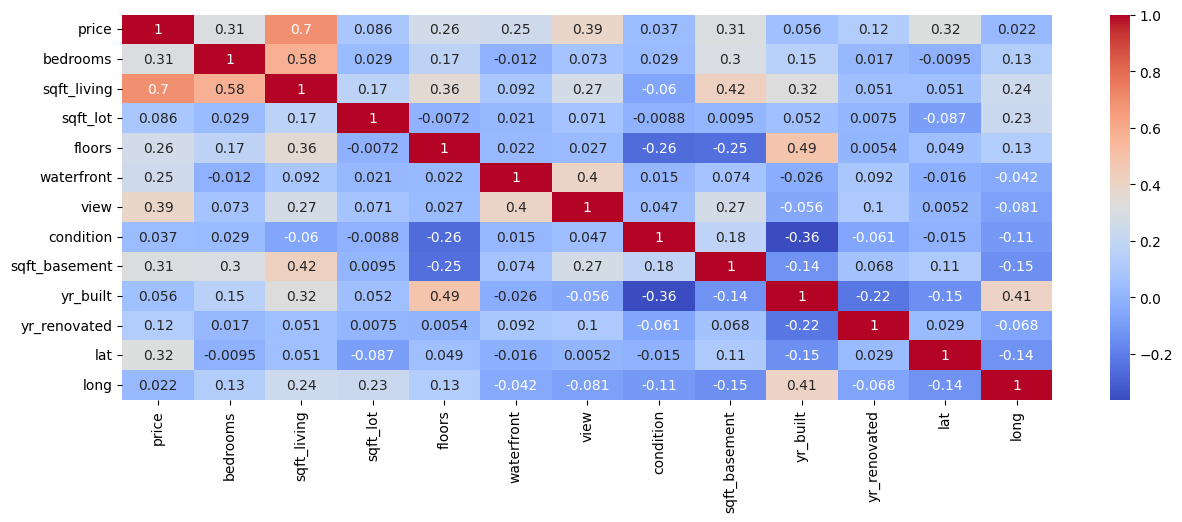

In [20]:
# Nueva base de datos
datos = dt.drop(['bathrooms','grade','sqft_above','sqft_living15','sqft_lot15'],axis=1)

# Matriz de correlaciones
correlaciones = datos.corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(15,5))
sns.heatmap(correlaciones,cmap="coolwarm",annot=True) 

## **Gráficos comparativos**

Como este análisis servirá de base para un futuro modelo de predicción de precios, se presentarán algunos gráficos que comparen el precio de las viviendas con algunas de las variables más influyentes.

Además, se plantearán otros gráficos de interés.

**Pair plot**

Comenzamos creando un plot que enfrente las variables dos a dos para ver cómo influyen unas en otras.

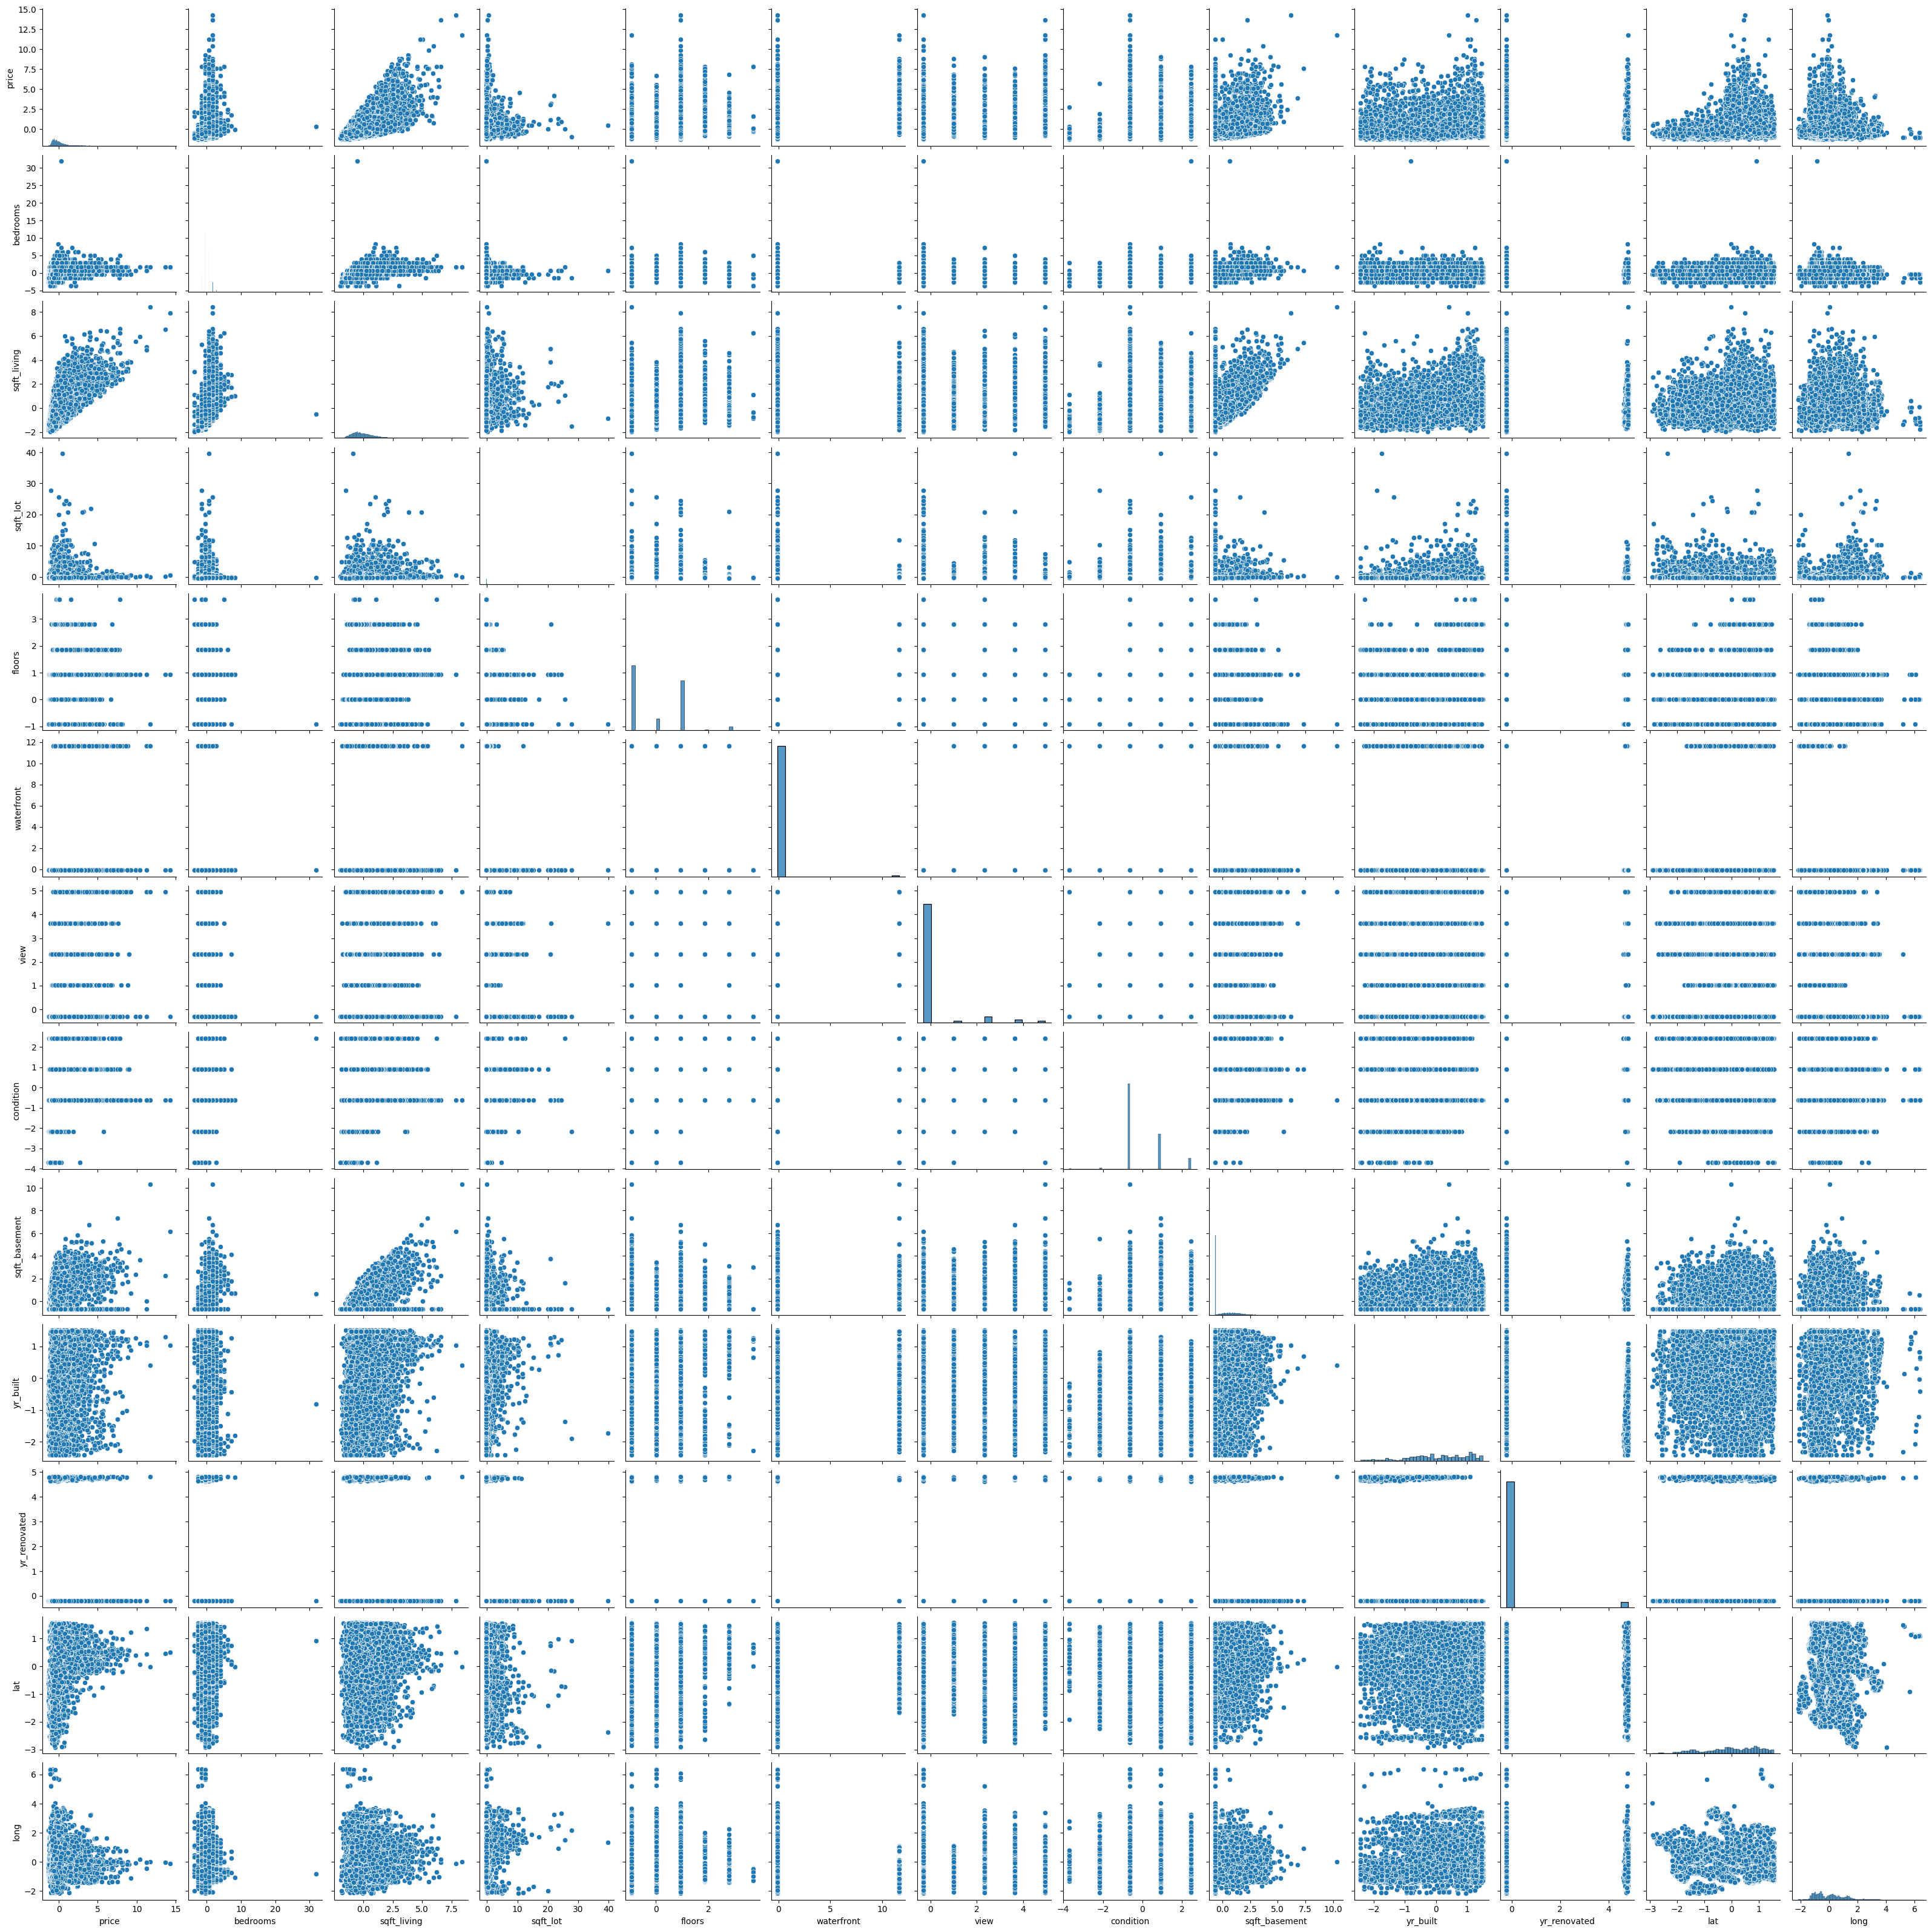

In [21]:
sns.pairplot(datos)
plt.show()

**Precio vs superficie**

Una de las primeras cosas en las que nos fijamos cuando queremos ver el precio de una vivienda es en cuánto mide esta. Así pues, veamos cuánto infuye esto.


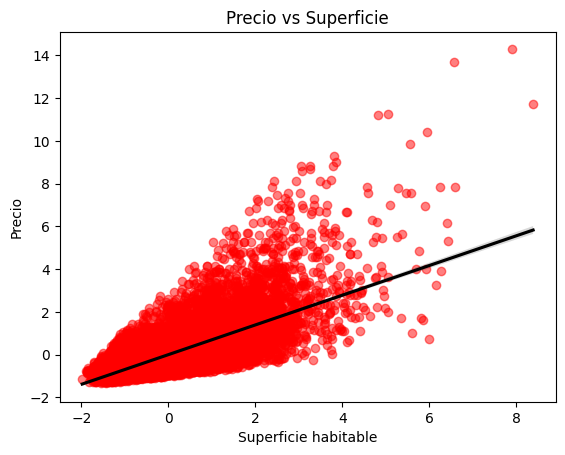

In [22]:
# Grafico
sns.regplot(x=datos.sqft_living, y=datos.price,scatter_kws = {"color": "red", "alpha": 0.5},line_kws = {"color": "black"})

# Personalizacion
plt.title('Precio vs Superficie', fontsize=12)
plt.xlabel('Superficie habitable', fontsize=10)
plt.ylabel('Precio', fontsize=10)

plt.show()

Este gráfico presenta una clara forma de embudo, siguiendo la estructura de a mayor superficie mayor precio.

**Precio vs parcela**

Al igual que antes, podríamos pensar que el tamaño de la parcela influye fuertemente en el precio.

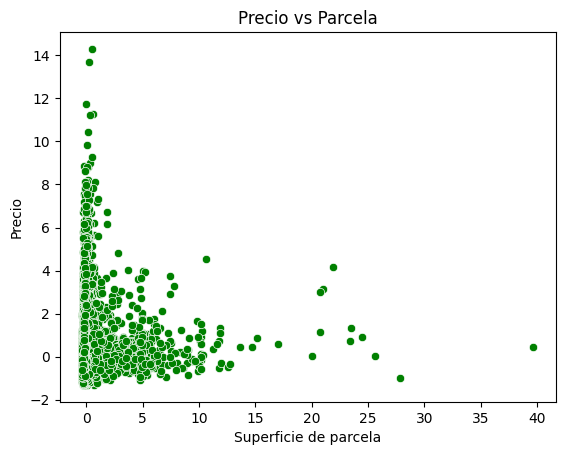

In [23]:
# Grafico
sns.scatterplot(x=datos.sqft_lot, y=datos.price, color='green')

# Personalizacion
plt.title('Precio vs Parcela', fontsize=12)
plt.xlabel('Superficie de parcela', fontsize=10)
plt.ylabel('Precio', fontsize=10)

plt.show()

Sorprendentemente, el tamaño de la parcela no parece influir de forma directa en el precio de la vivienda.

**Superficie habitable vs parcela**

A la vista de lo anterior y de la hipótesis planteada en **Eploración de datos**, planteamos esta comparativa.

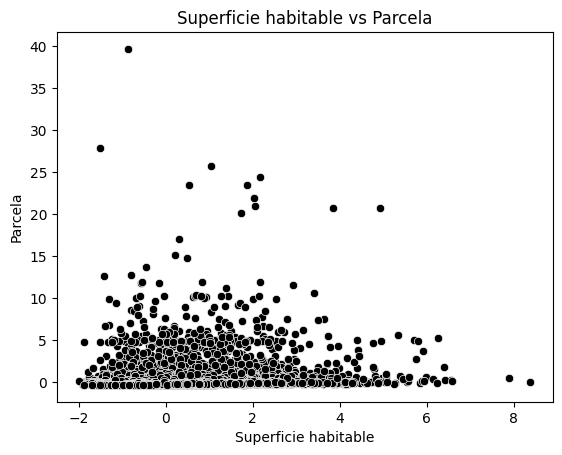

In [24]:
# Grafico
sns.scatterplot(x=datos.sqft_living, y=datos.sqft_lot, color='black')

# Personalizacion
plt.title('Superficie habitable vs Parcela', fontsize=12)
plt.xlabel('Superficie habitable', fontsize=10)
plt.ylabel('Parcela', fontsize=10)

plt.show()

En contra de lo planteado inicialmente, no existe una relación clara entre ambas variables.

**Lago**

En el descriptivo, hemos visto que, en la mayoría de los casos, las viviendas no tenían salida a un lago. Incluso, las que sí lo hacían acababan apareciendo como outliers. Veamos qué proporción de ellas presentan esta cualidad.

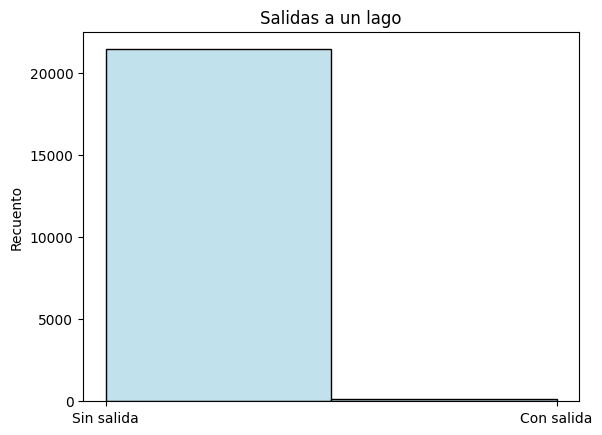

In [25]:
# Grafico
sns.histplot(dat['waterfront'], bins=2, color='lightblue') 

# Personalizacion
plt.title('Salidas a un lago')
plt.xticks(ticks=range(2),labels=['Sin salida','Con salida'])
plt.ylabel('Recuento');plt.xlabel('')

plt.show()

Como se puede ver, a penas existen casas con salida a un lago en nuestra base de datos. Por lo que debemos de plantearnos cómo de útil es esta variable.

**Número de plantas**

Veamos la altura que suelen presentar las casa del data set.

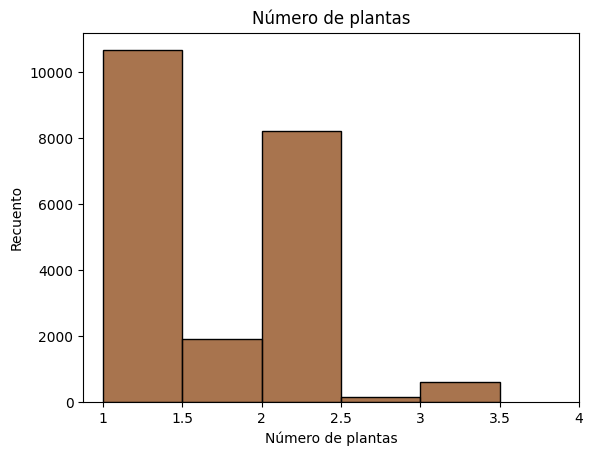

In [26]:
# Grafico
sns.histplot(dat['floors'], bins=5, color='#8B4513') 

# Personalizacion
plt.title('Número de plantas', fontsize=12)
plt.xlabel('Número de plantas', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.xticks( [1,1.5,2,2.5,3,3.5,4], [1,1.5,2,2.5,3,3.5,4])

plt.show()

La base de datos tiene recogidas viviendas con medias plantas. Aún así, las viviendas que más abundan son la de 1 piso y las de 2.

## **Modelos**

**División del data set**


Comenzamos diviendo el data set en variables predictoras y variable a predecir.

In [27]:
# Variable a predecir
y = datos.price

# Variables predictoras
X = datos.drop(['price'],axis=1)

**Modelo de regresión lineal**

Como primer modelo de predicción, vamos a emplear la regresión lineal múltiple. 
$$
\hat{y} =  \beta_0 + \beta^\intercal X  = \beta_0 + \beta_1 x_1 \ldots + \beta_p x_p 
$$

donde $\hat{y} \in \mathbb{R}$ es la variable a predecir y cada $x_i$ corresponde a una variable $p$ dimensional, $x_i \in \mathbb{R}^p$.


Una de las hipótesis más importantes de este modelo es que la varible *y* se distribuye de forma normal. Sin embargo, en el análisis de variables hemos comprobado que esto no se cumple.

Probamos a hacer una transformación logarítmica a la variable *price*

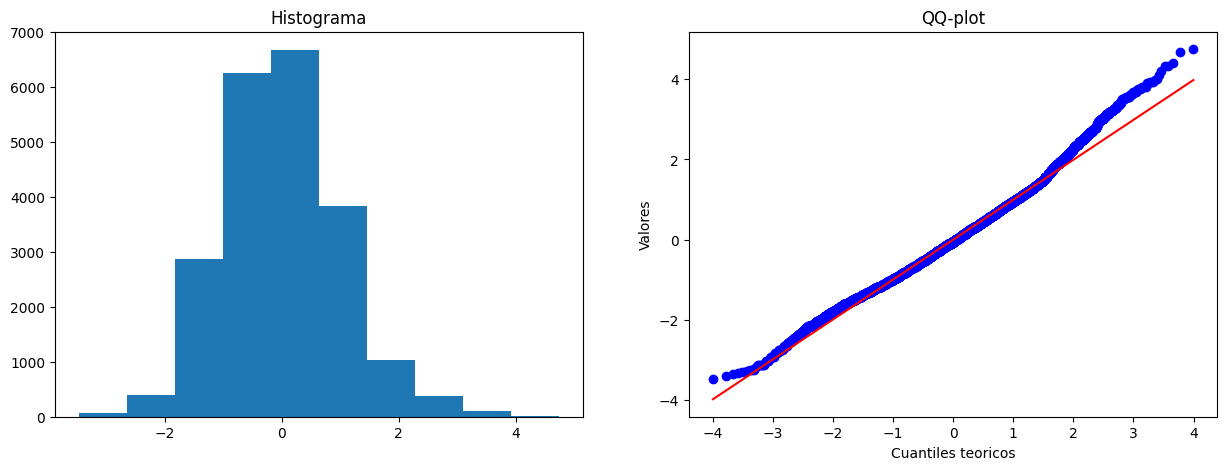

In [28]:
# Transformacion
yt = np.log(dat.price)

# Estandarizacion
yt = (yt - yt.mean()) / yt.std() 

# Graficos
plt.figure(figsize=(15,5))

# Histograma
plt.subplot(121) 
plt.hist(yt)
plt.title('Histograma')

# QQplot
plt.subplot(122) 
stats.probplot(yt, dist="norm", plot=plt)
plt.title('QQ-plot');plt.ylabel('Valores');plt.xlabel('Cuantiles teoricos')
plt.show()


Una vez nuestros datos son aptos para el modelo, los dividimos en entrenamiento y validación. En este caso, usaremos el 70% de los datos para crear el modelo y el 30% para validarlo.


**NOTA:** Para evitar cruce de datos, cada vez que se plantee un nuevo modelo, se volverán a reescribir estas variables. Para poder hacer una buena comparativa de modelos, es necesario que estén entrenados con los mismos datos. Por esos motivos, al inicio de cada modelo, se tomarán las mismas variables haciendo un split con semilla (la semilla es para tomar siempre el mismo corte de datos).

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size=0.3, random_state=0) 

Ajustamos el modelo a nuestros datos.

In [30]:
from sklearn.linear_model import LinearRegression

# Instaciacion
lin_reg = LinearRegression()

# Entrenamiento
lin_reg.fit(X_train,y_train)

LinearRegression()

Hacemos las predicciones que usaremos como prueba.

In [31]:
# Predeccion sobre los datos de train
y_pred_train = lin_reg.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = lin_reg.predict(X_test)

Validamos el modelo.

In [32]:
#TRAIN
# Medidas de precision 
rmse_reg_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_reg_train = mean_absolute_error(y_train, y_pred_train)
r2_reg_train = r2_score(y_train, y_pred_train)

# Valores
print("RMSE de train:", rmse_reg_train) 
print("MAE de train:", mae_reg_train)
print("R2 de train:", r2_reg_train) 

#TEST
# Medidas de precision 
rmse_reg_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_reg_test = mean_absolute_error(y_test, y_pred_test)
r2_reg_test = r2_score(y_test, y_pred_test)

# Validacion cruzada
cv_reg_test = cross_val_score(lin_reg, X_train, y_train, cv=5).mean()

# Valores
print('----------------------------------')
print("RMSE de test:", rmse_reg_test) 
print("MAE de test:", mae_reg_test)
print("R2 de test:", r2_reg_test) 
print("CV de test: ", cv_reg_test)

RMSE de train: 0.5440160751496089
MAE de train: 0.42014562879323347
R2 de train: 0.7048435723836692
----------------------------------
RMSE de test: 0.5437332381488562
MAE de test: 0.42039292255266403
R2 de test: 0.7023573204234923
CV de test:  0.7042181891970973


En general, el modelo parece ajustarse bastante bien al objetivo. Sin embargo, aun hay bastante margen de mejora. 

**Modelo k-nn**

El modelo k-nn es un modelo de predicción no paramétrico que se basa en buscar la observaciones más parecidas para imputar un valor a la observación a predecir. Para ello, sigue el siguiente procedimiento:

1. Calcular las distancias: Se calcula la distancia entre el punto de datos desconocido y cada punto de datos en el conjunto de entrenamiento. 

2. Seleccionar los k vecinos más cercanos: Se seleccionan los k vecinos más cercanos al punto de datos desconocido basándose en las distancias calculadas.

3. Valoración del punto desconocido: Se determina el valor del punto desconocido como la media de los k vecinos más cercanos. 

Así pues, dividimos la base de datos con la que finalizamos el análisis de variables en entrenamiento y test.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

En el modelo de knn se deben escoger los vecinos a evaluar de forma previa. La mejor forma de hacer esto es hiperparametrizando el número de vecinos.

k optimo: 7


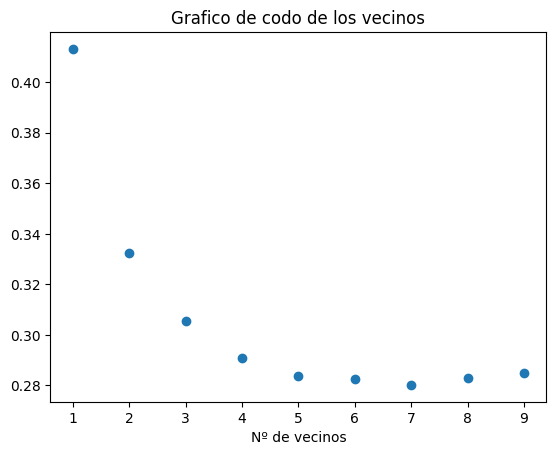

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Posibles numeros de vecinos
ks = list(range(1, 10))

# Almacenamiento de los cv_scores
cv_scores = []

for k in ks:

    # Modelo de k vecinos
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Validacion cruzada del modelo
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

# k optimo
k_optimo = ks[np.argmin(cv_scores)]
print('k optimo:',k_optimo)

# Grafico de codo
plt.scatter(ks, cv_scores)
plt.title('Grafico de codo de los vecinos');plt.xlabel('Nº de vecinos');

A pesar de que la hiperparametrización nos sugiere como número óptimo de vecinos k=7, tomaremos tan solo 4. Esta decisión se basa en el gráfico de codo anterior, ya que la mejora de la precisión no aumenta significativamente a partir de este número de vecinos.

Por tanto, al igual que antes, ajustamos el modelo

In [35]:
from sklearn.neighbors import KNeighborsRegressor

# Instaciacion
knn = KNeighborsRegressor(n_neighbors=4)

# Entrenamiento
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

Hacemos las predicciones en train y test.

In [36]:
# Predeccion sobre los datos de train
y_pred_train = knn.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = knn.predict(X_test)

Analizamos las medidas de precisión.

In [37]:
#TRAIN
# Medidas de precision 
rmse_knn_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_knn_train = mean_absolute_error(y_train, y_pred_train)
r2_knn_train = r2_score(y_train, y_pred_train)

# Valores
print("RMSE de train:", rmse_knn_train) 
print("MAE de train:", mae_knn_train)
print("R2 de train:", r2_knn_train) 

#TEST
# Medidas de precision 
rmse_knn_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_knn_test = mean_absolute_error(y_test, y_pred_test)
r2_knn_test = r2_score(y_test, y_pred_test)

# Validacion cruzada
cv_knn_test = cross_val_score(lin_reg, X_train, y_train, cv=5).mean()

# Valores
print('----------------------------------')
print("RMSE de test:", rmse_knn_test) 
print("MAE de test:", mae_knn_test)
print("R2 de test:", r2_knn_test) 
print("CV de test: ", cv_knn_test)

RMSE de train: 0.40381748326007233
MAE de train: 0.21756184215688282
R2 de train: 0.8399134241971257
----------------------------------
RMSE de test: 0.49241743203100885
MAE de test: 0.2765659093937676
R2 de test: 0.7464029806189718
CV de test:  0.6461500190786519


Parece ser que este modelo da mejores resultados que el anterior, pues mejora sustancialmente las medidas de precisión.

**Modelo de árbol**

Un árbol de decisión es un modelo que se basa en una estructura en forma de árbol que se divide en nodos y ramas, donde cada nodo representa una pregunta o una prueba sobre una determinada característica del conjunto de datos de entrada.

La idea básica detrás de cualquier algoritmo de árbol de decisión es:
1. Selecciona el mejor atributo para dividir las observaciones.
2. Considera ese atributo como un nodo de decisión y divide el conjunto de
datos en subconjuntos más pequeños.
3. Repite el proceso recursivamente para cada nodo hijo hasta que una de las condiciones coincida con lo siguiente:
> * Todas las tuplas pertenecen al mismo valor de atributo.
> * No quedan más atributos.
> * No hay más instancias


Como el árbol de decisión es un modelo de clasificación, necesitaremos discretizar la variable objetivo. En este caso crearemos cuatro grupos limitados por los cuartiles. Así pues, tendremos los siguientes grupos:
* Grupo 1: aquellas casas cuyo valor esté por debajo del primer cuartil
* Grupo 2: aquellas casas cuyo valor esté entre el primer y el segundo cuartil
* Grupo 3: aquellas casas cuyo valor esté entre el segundo y el tercer cuartil
* Grupo 4: aquellas casas cuyo valor esté por encima del tercer cuartil

In [38]:
# Cuartiles
q1 = np.quantile(dat['price'], q =0.25)
q2 = np.quantile(dat['price'], q =0.50)
q3 = np.quantile(dat['price'], q =0.75)

# Codificacion
grupos = [1,2,3,4]
cortes = [0,q1,q2,q3,float("inf")]

# Agrupacion
y_agrupado = pd.DataFrame(dat['price'])
y_agrupado['grupo'] = pd.cut(dat['price'], bins=cortes, labels=grupos)

# Visualizacion
y_agrupado.head(10)

price grupo
id                         
7129300520   221900.0     1
6414100192   538000.0     3
5631500400   180000.0     1
2487200875   604000.0     3
1954400510   510000.0     3
7237550310  1225000.0     4
1321400060   257500.0     1
2008000270   291850.0     1
2414600126   229500.0     1
3793500160   323000.0     2

Así pues, ajustemos un modelo de árbol a nuestra nueva variable objetivo.

De nuevo, dividimos en train y test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_agrupado['grupo'], test_size=0.3, random_state=0) 

Ajustamos el modelo.

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Instaciacion
arbol = DecisionTreeClassifier()

# Entrenamiento
arbol.fit(X_train,y_train) 

DecisionTreeClassifier()

Predecimos.

In [41]:
# Predeccion sobre los datos de train
y_pred_train = arbol.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = arbol.predict(X_test)

Validamos el modelo.

In [42]:
# TRAIN
# Medidas de precision
score_arbol_train = arbol.score(X_train,y_train) 
acc_arbol_train = accuracy_score(y_pred_train,y_train)

# Valores
print("Score de train:", score_arbol_train) 
print("Accuracy de train:", acc_arbol_train)

# TEST
# Medidas de precision
score_arbol_test =arbol.score(X_test,y_test)
acc_arbol_test = accuracy_score(y_pred_test,y_test)
mc_arbol_test = confusion_matrix(y_test,y_pred_test)
report_arbol_test = classification_report(y_test,y_pred_test)

# Valores
print('----------------------------------')
print("Accuracy de test:", acc_arbol_test)
print("Matriz de confusion de test:", mc_arbol_test) 
print(report_arbol_test)

Score de train: 0.997485608416595
Accuracy de train: 0.997485608416595
----------------------------------
Accuracy de test: 0.682309354739117
Matriz de confusion de test: [[1284  324   55    6]
 [ 325  947  321   42]
 [  60  311  922  261]
 [   2   46  305 1267]]
              precision    recall  f1-score   support

           1       0.77      0.77      0.77      1669
           2       0.58      0.58      0.58      1635
           3       0.58      0.59      0.58      1554
           4       0.80      0.78      0.79      1620

    accuracy                           0.68      6478
   macro avg       0.68      0.68      0.68      6478
weighted avg       0.68      0.68      0.68      6478



Claramente se ve uno de los grandes defectos del árbol de decisión, se adapta a la perfección a los datos de entrenamiento (accuracy_train > 0.99). A pesar de esto, para ser un árbol de decisión, no hace malas predicciones pues su accuracy en predicción es de casi un 70%. Además, si nos fijamos en la matriz de confusión, todas las categorías presentan un mayor número de observaciones bien catalogadas que mal catalogadas. 

En este tipo de predicciones, la fuente de información más fiable es la matriz de confusión por lo que la representamos de una forma más manejable.

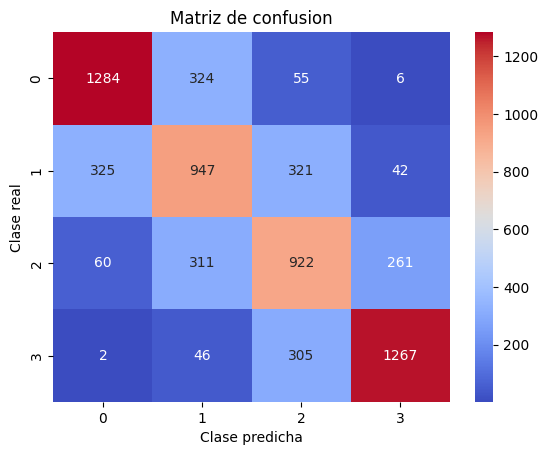

In [43]:
sns.heatmap(mc_arbol_test,cmap="coolwarm",annot=True, fmt="d") 
plt.title("Matriz de confusion");plt.ylabel('Clase real');plt.xlabel('Clase predicha')
plt.show()

Gracias a esta representación se ve claramente la buena clasificación que hace este árbol.

La estructura de un árbol de decisión permite detectar de forma sencilla aquellas variables que son más influyentes en la predicción. 

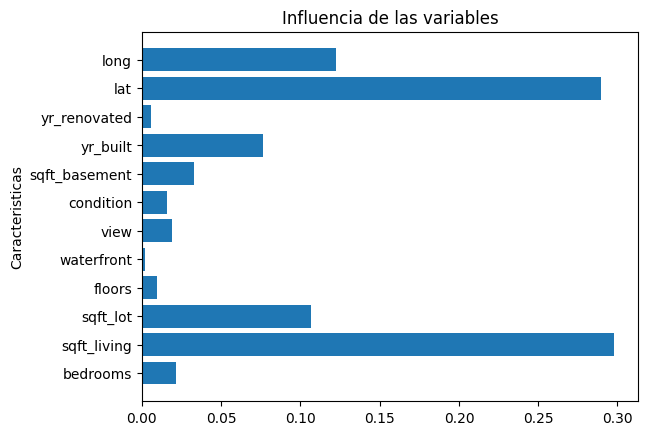

In [44]:
plt.barh(range(X.shape[1]), arbol.feature_importances_) 
plt.yticks(np.arange(X.shape[1]), X.columns)  
plt.title('Influencia de las variables')
plt.ylabel('Caracteristicas')
plt.show()

Las características más relevantes para crear el árbol de decisión son ***sqft_living***, ***lat***, ***long*** y ***sqft_lot*** (en ese orden). De esto se deduce que a la hora tasar una casa, las características más importantes son su ubicación y su dimensión.

Por último, como el árbol de decisión sigue una estructura similar al pensamiento humano, tiene fácil representación en el plano. 

**NOTA:** El árbol es muy grande por lo que supone un coste computacional muy alto su representación gráfica.

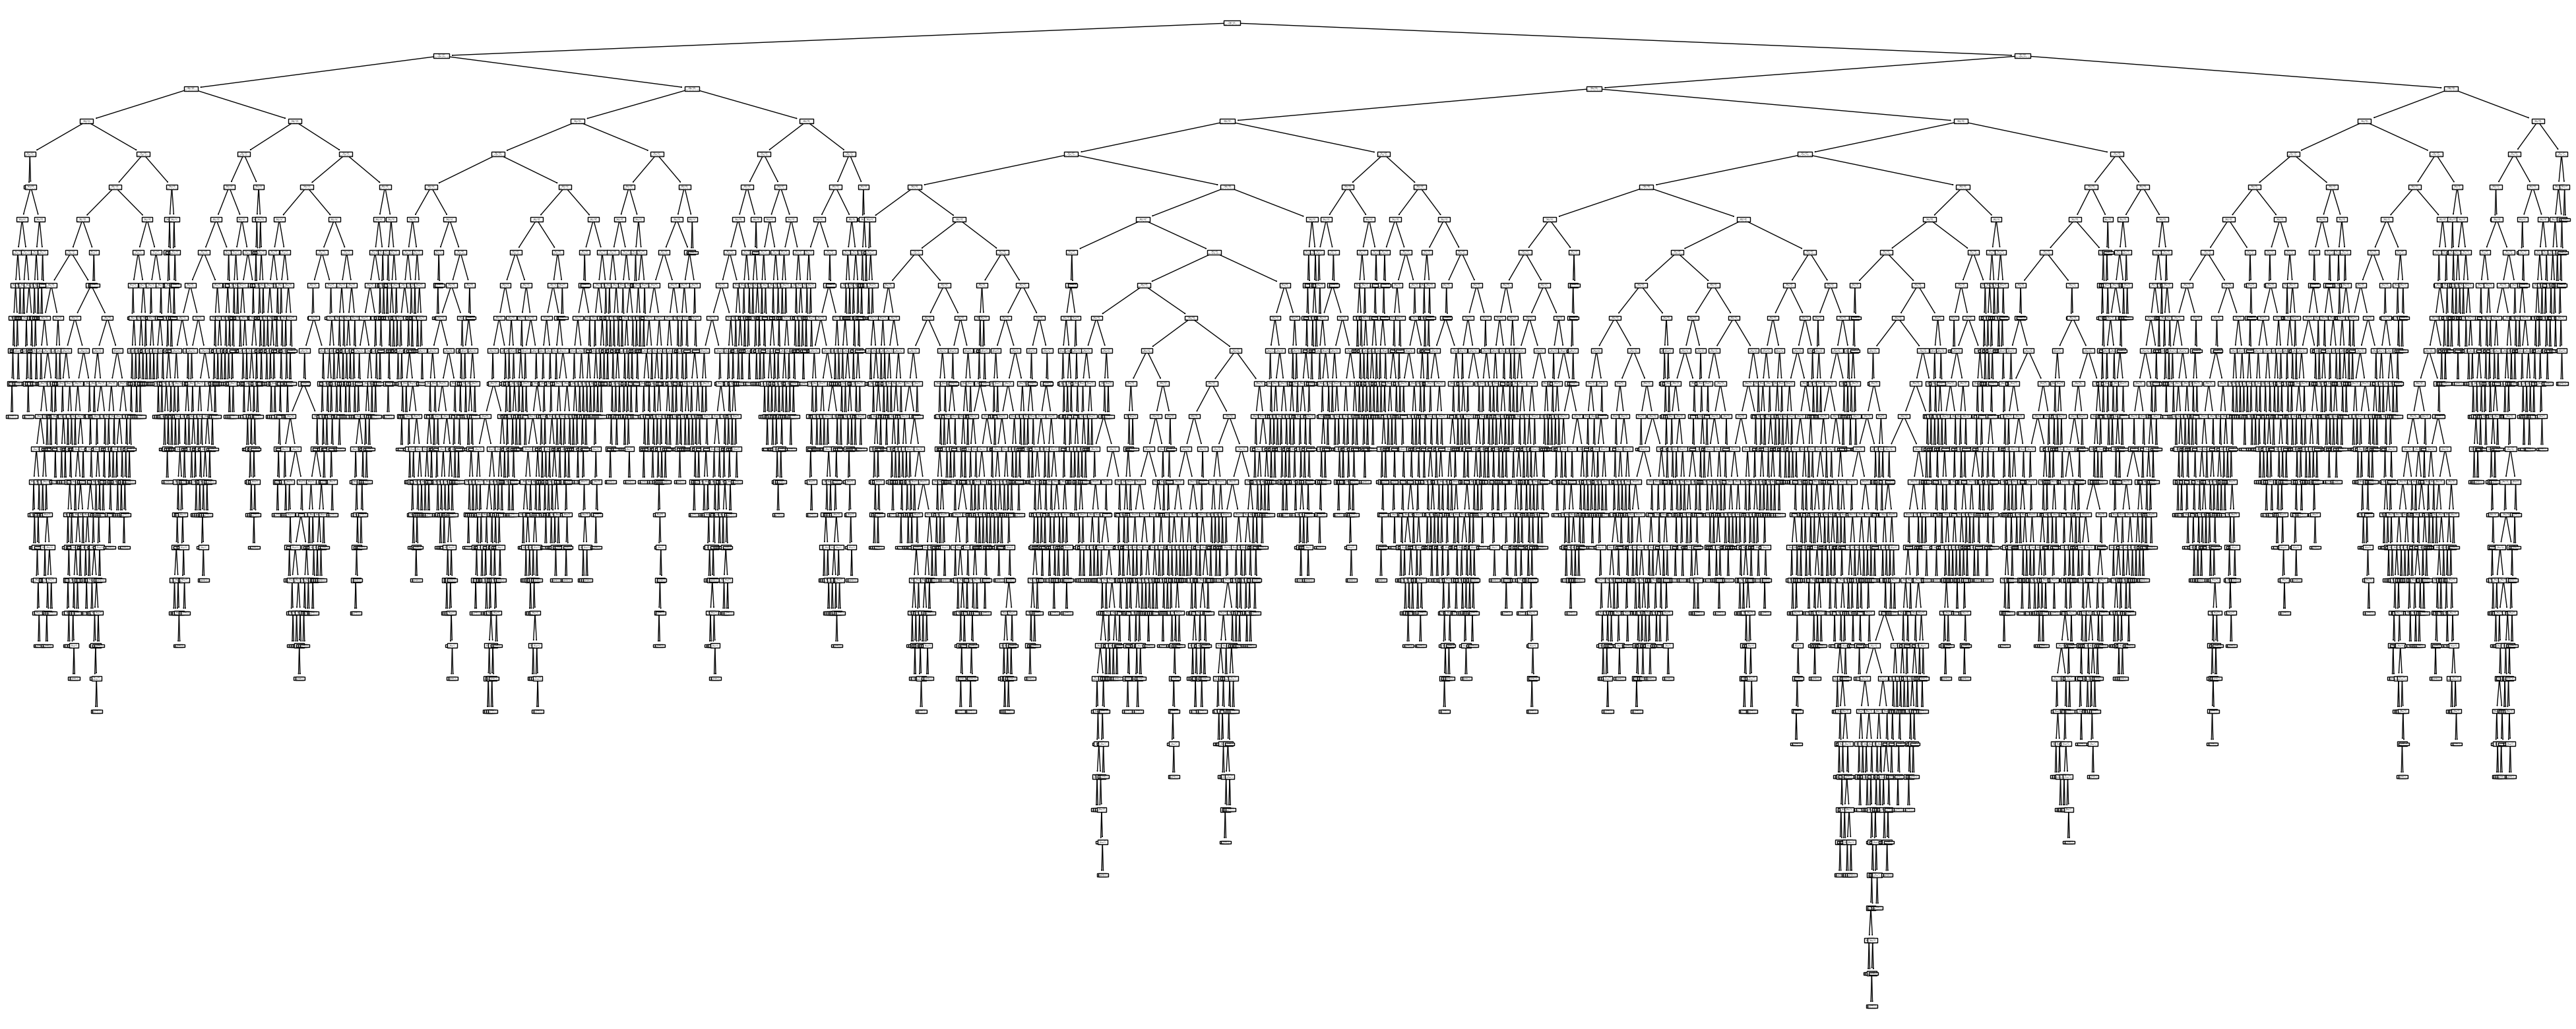

In [45]:
from sklearn import tree
plt.figure(figsize=(50,20))
tree.plot_tree(arbol)
plt.show()

**Modelo de random forest**

Como ya hemos visto, el modelo de árbol de decisión no es muy bueno para este tipo de problemas. Por tanto, vamos a aplicar una modificación del mismo. Esta modificación se basa combinar la salida de varios árboles de decisión distintos y es conocida bajo el nombre de random forest. 

Dividimos la base en train y test.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

Como el número de árboles que forman el bosque puede ser elegido de antemano, hacemos una hiperparametrización para buscar el número óptimo.

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Instanciacion del objeto
rand_forest = RandomForestRegressor()

# Posibles numero de arboles
n_arboles = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]}

# Hiperparametrizacion
cv = GridSearchCV(estimator=rand_forest, param_grid=n_arboles, n_jobs=-1, cv=5)
cv.fit(X_train, y_train)

# nuemro de arboles optimo
print('Numero optimo de arboles:',cv.best_params_['n_estimators'])

Numero optimo de arboles: 60


Como cada vez que se ejecuta este fragmento de código sale una solución distinta, volvemos a  hiperparametrizar evaluando el óptimo con un gráfico de codo sobre el RMSE.

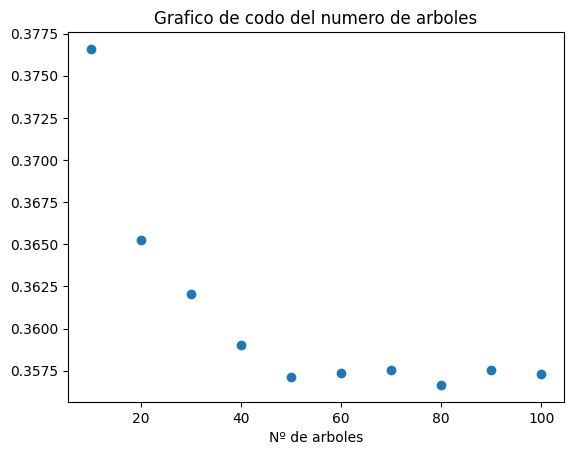

In [48]:
# Posibles numeros de vecinos
arboles = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Almacenamiento de mse
rmse_scores = []

for k in arboles:

    # Modelo de k vecinos
    rf = RandomForestRegressor(n_estimators=k, random_state=42)
    rf.fit(X_train, y_train)

    # Validacion
    y_pred_test = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_scores.append(rmse)

# Grafico de codo
plt.scatter(arboles, rmse_scores)
plt.title('Grafico de codo de numero de arboles');plt.xlabel('Nº de arboles');
plt.title('Grafico de codo del numero de arboles')
plt.show()

A la vista del gráfico, lo óptimo sería tomar 50 árboles.

In [49]:
# Instanciacion del objeto
rand_forest = RandomForestRegressor(n_estimators=50)

# Entrenamiento
rand_forest.fit(X_train,y_train) 

RandomForestRegressor(n_estimators=50)

Hacemos las predicciones que vamos a usar como prueba.

In [50]:
# Predeccion sobre los datos de train
y_pred_train = rand_forest.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = rand_forest.predict(X_test)

Validamos el modelo.

In [51]:
#TRAIN
# Medidas de precision 
rmse_randforest_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_randforest_train = mean_absolute_error(y_train, y_pred_train)
r2_randforest_train = r2_score(y_train, y_pred_train)

# Valores
print("RMSE de train:", rmse_randforest_train) 
print("MAE de train:", mae_randforest_train)
print("R2 de train:", r2_randforest_train) 

#TEST
# Medidas de precision 
rmse_randforest_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_randforest_test = mean_absolute_error(y_test, y_pred_test)
r2_randforest_test = r2_score(y_test, y_pred_test)

# Validacion cruzada
cv_randforest_test = cross_val_score(rand_forest, X_train, y_train, cv=5).mean()

# Valores
print('----------------------------------')
print("RMSE de test:", rmse_randforest_test) 
print("MAE de test:", mae_randforest_test)
print("R2 de test:", r2_randforest_test) 
print("CV de test: ", cv_randforest_test)

RMSE de train: 0.1453267358805793
MAE de train: 0.07978512087406057
R2 de train: 0.9792663521456905
----------------------------------
RMSE de test: 0.3580276011118783
MAE de test: 0.2042236553071598
R2 de test: 0.8659365707508528
CV de test:  0.8479013423176269


Este modelo mejora, con diferencia, a los modelos anteriores. 

**Modelo del potenciación del gradiente (Gradient Boost)**

Otra forma de mejorar el modelo de árbol es mediante la creación de sucesivos modelos de árbol, de forma que, cada árbol aprenda de los errores del anterior. Este es el caso del modelo de gradient boosting.

División del data test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

Hiperparametrizamos el número de árboles a concatenar.

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Instanciacion del objeto
grad_boost = GradientBoostingRegressor()

# Posibles numero de arboles
n_arboles = {'n_estimators': [100,200,250,300,400]}

# Hiperparametrizacion
cv = GridSearchCV(grad_boost, n_arboles, cv=5)
cv.fit(X_train, y_train)

# nuemro de arboles optimo
print('Numero optimo de arboles:',cv.best_params_)

Numero optimo de arboles: {'n_estimators': 400}


Como de esta forma, siempre obtienes que el número óptimo de árboles es la opción más alta, hiperparametrizamos de nuevo y basamos la decisión en un gráfico de codo.

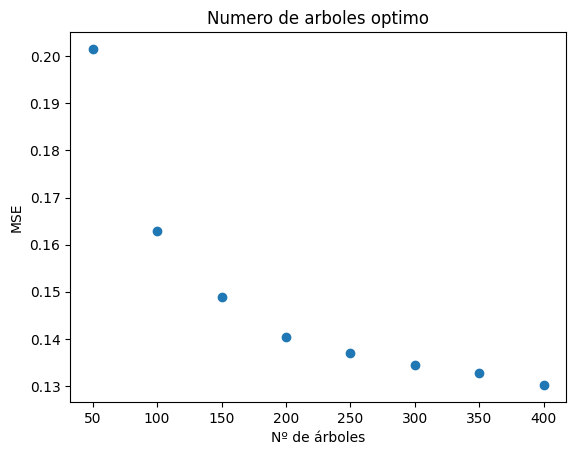

In [54]:
# Inicializacion
mse_scores = []

# Hiperparametrizacion
for a in [50,100,150,200,250,300,350,400]:
    gb = GradientBoostingRegressor(n_estimators=a)
    
    # Entrenar el modelo
    gb.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = gb.predict(X_test)
    
    # Calcular el MSE del modelo y agregarlo a la lista de puntuaciones
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Graficar el gráfico de codo
plt.scatter( [50,100,150,200,250,300,350,400], mse_scores)
plt.xlabel('Nº de árboles');plt.ylabel('MSE')
plt.title('Numero de arboles optimo')
plt.show()

Con esto vemos que, a partir de 200 árboles la mejora del MSE no es significativa. Por tanto, nos quedamos con un modelo de Gradient Boost de 200 árboles.

Así pues, ajustamos el modelo con 200 árboles.

In [55]:
# Instanciacion del objeto
grad_boost = GradientBoostingRegressor(n_estimators=200)

# Entrenamiento
grad_boost.fit(X_train,y_train) 

GradientBoostingRegressor(n_estimators=200)

Predecimos

In [56]:
# Predeccion sobre los datos de train
y_pred_train = grad_boost.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = grad_boost.predict(X_test)

Validamos el modelo.

In [57]:
#TRAIN
# Medidas de precision 
rmse_gradboost_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_gradboost_train = mean_absolute_error(y_train, y_pred_train)
r2_gradboost_train = r2_score(y_train, y_pred_train)

# Valores
print("RMSE de train:", rmse_gradboost_train) 
print("MAE de train:", mae_gradboost_train)
print("R2 de train:", r2_gradboost_train) 

#TEST
# Medidas de precision 
rmse_gradboost_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_gradboost_test = mean_absolute_error(y_test, y_pred_test)
r2_gradboost_test = r2_score(y_test, y_pred_test)

# Validacion cruzada
cv_gradboost_test = cross_val_score(grad_boost, X_train, y_train, cv=5).mean()

# Valores
print('----------------------------------')
print("RMSE de test:", rmse_gradboost_test) 
print("MAE de test:", mae_gradboost_test)
print("R2 de test:", r2_gradboost_test) 
print("CV de test: ", cv_gradboost_test)

RMSE de train: 0.33469398935505684
MAE de train: 0.21079310660312855
R2 de train: 0.8900284095699398
----------------------------------
RMSE de test: 0.37476995135808006
MAE de test: 0.2261954923375213
R2 de test: 0.8531050615393014
CV de test:  0.8398471517049355


De nuevo, obtenemos muy buenas métricas. Sin embargo, no llega a mejorar las del random forest.

**Modelo XGBoost**


Una posible mejora del modelo Gradient Boost es el modelo XGBoost que utiliza una combinación de árboles de decisión y técnicas de regularización para mejorar la precisión de los modelos de aprendizaje automático.

Dividimos en train y test.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

Al igual que con el resto de modelos basados en árboles de decisión, hiperparametrizamos el número de árboles a crear.

In [59]:
import xgboost as xgb

# Instanciacion del objeto
xg_boost = xgb.XGBRegressor(objective='reg:squarederror')

# Posibles numero de arboles
n_arboles = {'n_estimators': [10,25,50,100,150,175,200]}

# Hiperparametrizacion
cv = GridSearchCV(estimator=xg_boost, param_grid=n_arboles, n_jobs=-1, cv=5)
cv.fit(X_train, y_train)

# nuemro de arboles optimo
print('Numero optimo de arboles:',cv.best_params_)

Numero optimo de arboles: {'n_estimators': 150}


Así pues, ajustamos el modelo.

In [60]:
# Instanciacion del objeto
xg_boost = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=150)

# Entrenamiento
xg_boost.fit(X_train,y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predecimos.

In [61]:
# Predeccion sobre los datos de train
y_pred_train = xg_boost.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = xg_boost.predict(X_test)

Validamos el modelo.

In [62]:
#TRAIN
# Medidas de precision 
rmse_xgboost_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_xgboost_train = mean_absolute_error(y_train, y_pred_train)
r2_xgboost_train = r2_score(y_train, y_pred_train)

# Valores
print("RMSE de train:", rmse_xgboost_train) 
print("MAE de train:", mae_xgboost_train)
print("R2 de train:", r2_xgboost_train) 

#TEST
# Medidas de precision 
rmse_xgboost_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_xgboost_test = mean_absolute_error(y_test, y_pred_test)
r2_xgboost_test = r2_score(y_test, y_pred_test)

# Validacion cruzada
cv_xgboost_test = cross_val_score(xg_boost, X_train, y_train, cv=5).mean()

# Valores
print('----------------------------------')
print("RMSE de test:", rmse_xgboost_test) 
print("MAE de test:", mae_xgboost_test)
print("R2 de test:", r2_xgboost_test) 
print("CV de test: ", cv_xgboost_test)

RMSE de train: 0.15840457234271027
MAE de train: 0.11198070820334667
R2 de train: 0.9753668412090196
----------------------------------
RMSE de test: 0.35247779774165733
MAE de test: 0.20370553536600217
R2 de test: 0.870060605210771
CV de test:  0.853232879489686


Las métricas son muy buenas, incluso llegan a igualar (aproximadamente) a las del random forest en un tiempo computacional mucho menor.

**Modelo de bagging**


Al igual que el random forest emplea árboles de decisión en paralelo para mejorar el modelo, esto mismo se puede hacer con cualquier tipo de modelo simple. Con el bagging, tomaremos un modelo simple y lo ensamblaremos en paralelo para mejorar el resultado. En este caso, el modelo simple que tomaremos es el de la regresión lineal, ya que es uno de los que se ha empleado.

Como el modelo de regresión necesita cumplir con la hipótesis de normalidad, volvemos a tomar la variable *y* transformada. 

Dividimos la muestra en entrenamiento y test.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size=0.3, random_state=0) 

Hiperparametrizamos el bagging para hallar el número óptimo de regresiones a realizar.

In [64]:
from sklearn.ensemble import BaggingRegressor

# Instanciacion del objeto
bagging = BaggingRegressor(base_estimator=LinearRegression())

# Posibles numero de arboles
n_regresiones = {'n_estimators':range(1,50)}

# Hiperparametrizacion
cv = GridSearchCV(estimator=bagging, param_grid=n_regresiones, n_jobs=-1, cv=5)
cv.fit(X_train, y_train)

# nuemro de arboles optimo
print('Numero optimo de regresiones:',cv.best_params_)

Numero optimo de regresiones: {'n_estimators': 18}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


La hiperparametrización del número de regresiones es bastante inestable (en cada ejecución cambia el número óptimo). Aún así, suele estar siempre en torno a 10 por lo que tomamos este número para inicializar el modelo.

In [65]:
# Instanciacion del objeto
bagging = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10)

# Entrenamiento
bagging.fit(X_train,y_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=LinearRegression())

Predecimos.

In [66]:
# Predeccion sobre los datos de train
y_pred_train = bagging.predict(X_train)

# Predeccion sobre los datos del test
y_pred_test = bagging.predict(X_test)

Validamos el modelo.

In [67]:
#TRAIN
# Medidas de precision 
rmse_bagging_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_bagging_train = mean_absolute_error(y_train, y_pred_train)
r2_bagging_train = r2_score(y_train, y_pred_train)

# Valores
print("RMSE de train:", rmse_bagging_train) 
print("MAE de train:", mae_bagging_train)
print("R2 de train:", r2_bagging_train) 

#TEST
# Medidas de precision 
rmse_bagging_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_bagging_test = mean_absolute_error(y_test, y_pred_test)
r2_bagging_test = r2_score(y_test, y_pred_test)

# Validacion cruzada
cv_bagging_test = cross_val_score(bagging, X_train, y_train, cv=5).mean()

# Valores
print('----------------------------------')
print("RMSE de test:", rmse_bagging_test) 
print("MAE de test:", mae_bagging_test)
print("R2 de test:", r2_bagging_test) 
print("CV de test: ", cv_bagging_test)

RMSE de train: 0.5440511613777484
MAE de train: 0.4198694643415094
R2 de train: 0.7048054990245127


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


----------------------------------
RMSE de test: 0.543807483128477
MAE de test: 0.42030297216257706
R2 de test: 0.7022760306222965
CV de test:  0.7042097705265625


Vemos que, a pesar de la mejora del algoritmo, las métricas son muy similares a las de la regresión lineal simple.

## **Análisis de los modelos**

Para poder comprarar las métricas de los diferentes modelos de forma sencilla, vamos a crear un data frame que las agrupe todas. Este dataframe dejará fuera al árbol de decisión simple, ya que presenta unas métricas distintas

In [68]:
# Modelos
modelos = ['Regresion_lineal','k-nn','Random_forest','Gradient_boost','XGBoost','Bagging']

# Metricas
rmse_train = [rmse_reg_train,rmse_knn_train,rmse_randforest_train,rmse_gradboost_train,rmse_xgboost_train,rmse_bagging_train]
mae_train = [mae_reg_train,mae_knn_train,mae_randforest_train,mae_gradboost_train,mae_xgboost_train,mae_bagging_train]
r2_train = [r2_reg_train,r2_knn_train,r2_randforest_train,r2_gradboost_train,r2_xgboost_train,r2_bagging_train]

rmse_test = [rmse_reg_test,rmse_knn_test,rmse_randforest_test,rmse_gradboost_test,rmse_xgboost_test,rmse_bagging_test]
mae_test = [mae_reg_test,mae_knn_test,mae_randforest_test,mae_gradboost_test,mae_xgboost_test,mae_bagging_test]
r2_test = [r2_reg_test,r2_knn_test,r2_randforest_test,r2_gradboost_test,r2_xgboost_test,r2_bagging_test]
cv_test = [cv_reg_test,cv_knn_test,cv_randforest_test,cv_gradboost_test,cv_xgboost_test,cv_bagging_test]

# DataFrame
metricas = pd.DataFrame({'Modelos':modelos,'RMSE_train': rmse_train,'MAE_train':mae_train,'R2_train': r2_train,'RMSE_test': rmse_test,'MAE_test': mae_test,'R2_test': r2_test,'CV': cv_test})
metricas

Modelos  RMSE_train  MAE_train  R2_train  RMSE_test  MAE_test  \
0  Regresion_lineal    0.544016   0.420146  0.704844   0.543733  0.420393   
1              k-nn    0.403817   0.217562  0.839913   0.492417  0.276566   
2     Random_forest    0.145327   0.079785  0.979266   0.358028  0.204224   
3    Gradient_boost    0.334694   0.210793  0.890028   0.374770  0.226195   
4           XGBoost    0.158405   0.111981  0.975367   0.352478  0.203706   
5           Bagging    0.544051   0.419869  0.704805   0.543807  0.420303   

    R2_test        CV  
0  0.702357  0.704218  
1  0.746403  0.646150  
2  0.865937  0.847901  
3  0.853105  0.839847  
4  0.870061  0.853233  
5  0.702276  0.704210

Para mayor comodidad, traemos a este punto las medidas del árbol de decisión.

In [69]:
print(report_arbol_test)

              precision    recall  f1-score   support

           1       0.77      0.77      0.77      1669
           2       0.58      0.58      0.58      1635
           3       0.58      0.59      0.58      1554
           4       0.80      0.78      0.79      1620

    accuracy                           0.68      6478
   macro avg       0.68      0.68      0.68      6478
weighted avg       0.68      0.68      0.68      6478



En general, las métricas de train son mejores para el Random Forest muy seguido del XGBoost, mientras que las métricas de test son mejores para XGBoost muy seguido del Random Forest. 

Como ambos modelos tienen métricas muy similares, hacemos un análisis gráfico de sus resultados. A través de gráficos de dispersión, vamos a comparar los datos predichos con los reales.

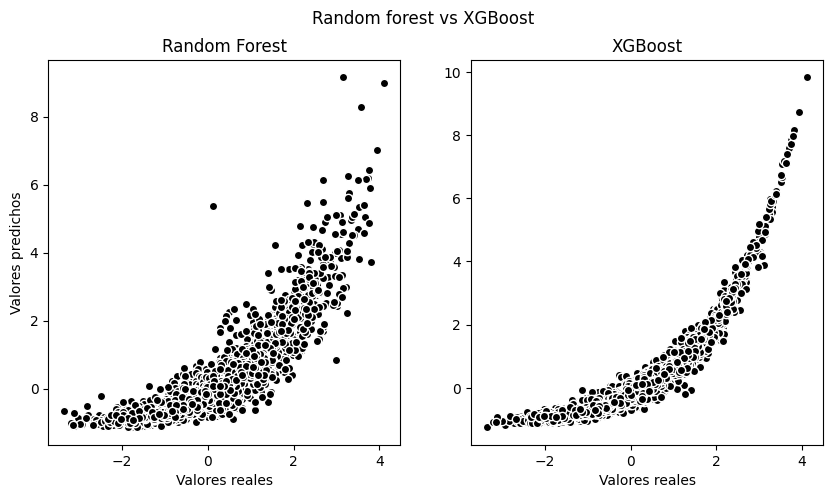

In [80]:
# Matriz de subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Grafico Random Forest
ax1.scatter(y_test, rand_forest.predict(X_test), c='black', edgecolor='white')
ax1.set_title('Random Forest');ax1.set_xlabel('Valores reales');ax1.set_ylabel('Valores predichos')

# Grafico XGBoost
ax2.scatter(y_test, xg_boost.predict(X_test), c='black', edgecolor='white')
ax2.set_title('XGBoost');ax2.set_xlabel('Valores reales')

# Etiquetas
plt.suptitle('Random forest vs XGBoost')


plt.show()

## **Modelo final: XGBoost**

Como hemos visto que el modelo óptimo es un XGBoost de 150 árboles, volvemos entrenar el modelo con todos los datos que tenemos.

In [81]:
# Instanciacion del objeto
xg_boost = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=150)

# Entrenamiento
xg_boost.fit(X,y) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Así pues, nuestro modelo está listo para realizar predicciones.